#CLASSES


In [ ]:
f = open("class.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [ ]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [ ]:
print(classes)

['light_bulb', 'circle', 'mountain', 'eye', 'bridge', 'bicycle', 'helmet', 'power_outlet', 't-shirt', 'pants', 'cat', 'sword', 'moon', 'envelope', 'paper_clip', 'eyeglasses', 'spider', 'tree', 'cookie', 'sock', 'hammer', 'tent', 'airplane', 'smiley_face', 'basketball', 'grapes', 'stop_sign', 'clock', 'knife', 'cup', 'frying_pan', 'cell_phone', 'pizza', 'alarm_clock', 'radio', 'triangle', 'snake', 'ice_cream', 'chair', 'coffee_cup', 'fan', 'diving_board', 'screwdriver', 'face', 'butterfly', 'line', 'ladder', 'flower', 'spoon', 'microphone', 'laptop', 'lollipop', 'bird', 'rifle', 'traffic_light', 'star', 'bench', 'pillow', 'square', 'syringe', 'tooth', 'shorts', 'table', 'ceiling_fan', 'apple', 'bread', 'wristwatch', 'dumbbell', 'key', 'broom', 'umbrella', 'bed', 'scissors', 'moustache', 'pencil', 'baseball_bat', 'anvil', 'rainbow', 'camera', 'beard', 'donut', 'headphones', 'mushroom', 'hot_dog', 'axe', 'suitcase', 'car', 'drums', 'lightning', 'wheel', 'tennis_racquet', 'saw', 'baseball'

#Download the Dataset

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
import urllib.request
def download():

  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')



In [ ]:
download()


https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/light%20bulb.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/circle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mountain.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bridge.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helmet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/power%20outlet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/t-shirt.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pants.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sword.npy
https://storage.googleapis.com/quickdraw_dataset/full/

#Load the Data

In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #randomize the dataset
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [ ]:
print(len(x_train))

320000


Show some random data

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28))
print(class_names[int(y_train[idx].item())])

#PREPROCESSING THE DATA

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(100, activation='softmax'))
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy', 'accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 64)         

In [ ]:
history = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1250/1250 - 228s - loss: 1.8613 - top_k_categorical_accuracy: 0.7958 - accuracy: 0.5487 - val_loss: 1.3623 - val_top_k_categorical_accuracy: 0.8780 - val_accuracy: 0.6601 - 228s/epoch - 182ms/step
Epoch 2/5
1250/1250 - 219s - loss: 1.2041 - top_k_categorical_accuracy: 0.8962 - accuracy: 0.6979 - val_loss: 1.1333 - val_top_k_categorical_accuracy: 0.9036 - val_accuracy: 0.7158 - 219s/epoch - 175ms/step
Epoch 3/5
1250/1250 - 217s - loss: 1.0460 - top_k_categorical_accuracy: 0.9141 - accuracy: 0.7353 - val_loss: 1.0403 - val_top_k_categorical_accuracy: 0.9143 - val_accuracy: 0.7375 - 217s/epoch - 173ms/step
Epoch 4/5
1250/1250 - 219s - loss: 0.9558 - top_k_categorical_accuracy: 0.9234 - accuracy: 0.7568 - val_loss: 0.9818 - val_top_k_categorical_accuracy: 0.9198 - val_accuracy: 0.7517 - 219s/epoch - 176ms/step
Epoch 5/5
1250/1250 - 220s - loss: 0.8947 - top_k_categorical_accuracy: 0.9293 - accuracy: 0.7716 - val_loss: 0.9385 - val_top_k_categorical_accuracy: 0.9241 - val_accuracy

#Testing

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.41%


#Inference


1/1 [==============================] - 0s 133ms/step
['knife', 'pencil', 'broom']


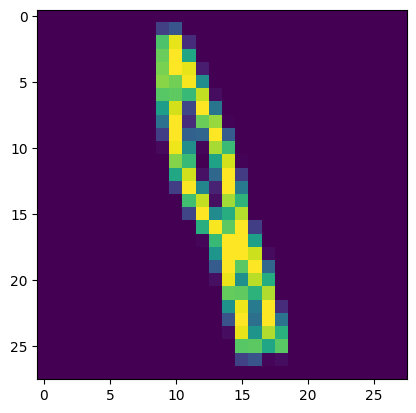

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze())
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:3]
latex = [class_names[x] for x in ind]
print(latex)

#Store classes

In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

#Store TensorFlowJS

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.6 MB/s eta 0:00:00


#Save Model

In [ ]:
model.save('keras.h5')

In [ ]:
model_save_name = 'keras.h5'

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

2023-11-06 10:04:27.112224: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 10:04:27.112320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 10:04:27.112418: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 10:04:29.220633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#Zip and Download

In [ ]:
!cp class_names.txt model/class_names.txt

In [ ]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 82%)
  adding: model/class_names.txt (deflated 42%)


In [ ]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>